<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
# 공부시간과 성적의 관계 

|공부시간|성적|예측값|
|:---:|:---:|:---:|
|2|81|**83.6**|
|4|93|**88.2**|
|6|91|**92.8**|
|8|97|**97.4**|

# fake_a_b는 임의의 예측값을 넣으면된다 
# 아래는 공식으로 순차적으로 풀기위해 
# 기본에서 계산처리한값들 

##  공식
* $ 공부시간(x) 평균 : (2 + 4 + 6 + 8) / 4 = 5 $
* $ 성적(y) 평균     : (81 + 93 + 91 + 97) / 4 = 90.5 $
### 1.  $ 기울기 a = {(x - x평균)(y - y평균)의 합     \over (x - x평균)^2의 합    } $
==> $ a = {(2-5)(81-90.5)+(4-5)(93-90.5)+(6-5)(91-90.5)+(8-5)(97-90.5) \over ((2-5)^2+(4-5)^2+(6-5)^2+(8-5)^2} $   
===> $ {46 \over 20} $   
====> $ 기울기 a = 2.3 $   
### 2 . $ y절편의 값 b = y의 평균 - (x의 평균 \times 기울기 a) $
==> $ b = 90.5 - (5 \times 2.3) $   
===> $ b = 90.5 - 11.5 $   
====> $ y절편의 값 b = 79 $
### 3. $ y = ax + b $
==> $ y = 2.3x + 79 $    
===> $y = 2.3 \times 2 + 79  = 83.6 $   
===> $y = 2.3 \times 4 + 79  = 88.2 $   
===> $y = 2.3 \times 6 + 79  = 82.8 $   
===> $y = 2.3 \times 8 + 79  = 87.4 $   
### 4.$ 오차 값 $
==> $ 오차 = 예측값 - 실제값 $   
===> $ 83.6 - 81 = 1.0 $   
===> $ 88.2 - 93 = 25.0 $   
===> $ 92.8 - 91 = 9.0 $  
===> $ 97.4 - 97 = 9.0 $
### 5 $ 평균 제곱 오차(MSE) $
==> $ \sum\limits_{i}^n (\hat{y_i} - y_i)^2 $   
===> $ (83.6 - 81)^2 = 6.7599999999999705   $         
===> $ (88.2 - 93)^2 = 23.039999999999974   $   
===> $ (92.8 - 91)^2 = 3.2399999999999896   $   
===> $ (97.4 - 97)^2 = 0.16000000000000456  $   
==> $ \frac{1}{n}\sum (\hat{y_i} - y_i)^2   $      
 > $ (6.7599999999999705 + 23.039999999999974 + 3.2399999999999896 + 0.16000000000000456) / 4 $   
 > $ 평균 제곱 오차(MSE) = 8.299999999999985 $

In [1]:
import numpy as np
import matplotlib.pyplot as pl


# 공부 시간X , 성적Y 리스트 생성 
# i[0] = [2, 4, 6, 8]
# i[1] = [81, 93, 91, 97]
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

print("x => ", x)
print("y => ", y)

x =>  [2, 4, 6, 8]
y =>  [81, 93, 91, 97]


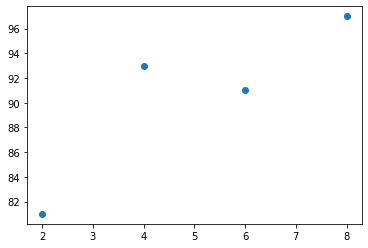

In [2]:
pl.scatter(x, y)
pl.show()

In [3]:
# 리스트 ==> 배열 각 개별 처리 위함
x_data = np.array(x)
y_data = np.array(y)
           
print("x_data => ", x_data)
print("y_data => ", y_data)

# 기울기 a와 y의 절편 b의 값 초기화
a = 0
b = 0

# 학습진행률
lr = 0.01

# 반복횟수
epochs = 10001

# 이해를 돕기위한 단순 출력
ex_y_pred = (a + lr) * x_data + b
print("y_pred_공식 => ", ex_y_pred)
ex_y_pred = (a + lr) * x_data + 81 # 2 * 2 + 81...
print("y_pred_실제값대입경우=> ", ex_y_pred)
ex_error = y_data - ex_y_pred # 오차 값 [ 실제값 - 예측 값]
print("ex_error=> ", ex_error)

x_data =>  [2 4 6 8]
y_data =>  [81 93 91 97]
y_pred_공식 =>  [0.02 0.04 0.06 0.08]
y_pred_실제값대입경우=>  [81.02 81.04 81.06 81.08]
ex_error=>  [-0.02 11.96  9.94 15.92]


In [4]:
# 몇 세대를 진행 할것인가.
for i in range(epochs):
    y_pred = a * x_data + b # 예측값 [ y = ax + b ]
    error = y_data - y_pred # 오차 값 [ 실제값 - 예측 값]
    
    # 평균제곱 오차를 a로 편미분한 결과
    a_diff = -(2/len(x_data)) * sum(x_data * (error))
    # 평균제곱 오차를 b로 편미분한 결과
    b_diff = -(2/len(x_data)) * sum(error)
    
    a = a - lr * a_diff # 학습률을 곱해 기존의 a값을 업데이트 
    b = b - lr * b_diff # 학습률을 곱채 기존의 b값을 업데이트
    
    if i%100 == 0: # 백번 반복될때 마다 현재의 a값 b값 출력
        print("a_diff = %.07f, b_diff = %.07f " %(a_diff, b_diff))
        print("epoch = %.f, 기울기 = %.07f, 절편 = %.07f"%(i, a, b))


a_diff = -928.0000000, b_diff = -181.0000000 
epoch = 0, 기울기 = 9.2800000, 절편 = 1.8100000
a_diff = 3.0028500, b_diff = -17.9197245 
epoch = 100, 기울기 = 11.5301188, 절편 = 23.9185987
a_diff = 2.1700674, b_diff = -12.9500341 
epoch = 200, 기울기 = 8.9703231, 절편 = 39.1943644
a_diff = 1.5682410, b_diff = -9.3585915 
epoch = 300, 기울기 = 7.1204375, 절편 = 50.2336908
a_diff = 1.1333196, b_diff = -6.7631664 
epoch = 400, 기울기 = 5.7835820, 절편 = 58.2114726
a_diff = 0.8190152, b_diff = -4.8875325 
epoch = 500, 기울기 = 4.8174776, 절편 = 63.9767703
a_diff = 0.5918771, b_diff = -3.5320695 
epoch = 600, 기울기 = 4.1193037, 절편 = 68.1431737
a_diff = 0.4277314, b_diff = -2.5525180 
epoch = 700, 기울기 = 3.6147548, 절편 = 71.1541054
a_diff = 0.3091083, b_diff = -1.8446263 
epoch = 800, 기울기 = 3.2501329, 절편 = 73.3300131
a_diff = 0.2233831, b_diff = -1.3330547 
epoch = 900, 기울기 = 2.9866318, 절편 = 74.9024748
a_diff = 0.1614321, b_diff = -0.9633577 
epoch = 1000, 기울기 = 2.7962077, 절편 = 76.0388445
a_diff = 0.1166620, b_diff = -0.69618